# Data Analyst Associate Example Practical Exam
Author: Mauro César

### Context
This notebook aims to reproduce the step by step to the [practical exam sample](https://s3.amazonaws.com/talent-assets.datacamp.com/Associate+DS+Case+Study+-+Coffee+Shops+-+Sample.pdf). Further details and guidelines can be found in the [Practical Hub](https://app.datacamp.com/certification/resource-center/practical-hub)

## Imports

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [11]:

# Read data from 'coffee.csv' and store it in a dataset
coffee = pd.read_csv('coffee.csv', index_col=None)


# Change the spaces for undescore and put everything in lower case
coffee.columns = coffee.columns.str.lower()
coffee.columns = [c.replace(" ", "_") for c in coffee.columns]

# Print numes of rows x columns
print(f"Number of rows/records: {coffee.shape[0]}")
print(f"Number of columns/variables: {coffee.shape[1]}")

# Print Head of dataframe
coffee.head()

Number of rows/records: 200
Number of columns/variables: 9


,region,place_name,place_type,rating,reviews,price,delivery_option,dine_in_option,takeout_option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


## Task 1: Data Validation
For every column in the data:
- State whether the values match the description given in the table above.
- State the number of missing values in the column
- Describe what you did to make values match the description if they did not match.

In [12]:
coffee.head()

,region,place_name,place_type,rating,reviews,price,delivery_option,dine_in_option,takeout_option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


We can see below that the following columns have missing values: 
- Rating: 2
- Reviews: 2
- Dine in option: 60
- Takeout option: 56

In [13]:
# Check for missing values
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           200 non-null    object 
 1   place_name       200 non-null    object 
 2   place_type       200 non-null    object 
 3   rating           198 non-null    float64
 4   reviews          198 non-null    float64
 5   price            200 non-null    object 
 6   delivery_option  200 non-null    bool   
 7   dine_in_option   140 non-null    object 
 8   takeout_option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


In [14]:
# Check to see if the number of nulls changed
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           200 non-null    object 
 1   place_name       200 non-null    object 
 2   place_type       200 non-null    object 
 3   rating           198 non-null    float64
 4   reviews          198 non-null    float64
 5   price            200 non-null    object 
 6   delivery_option  200 non-null    bool   
 7   dine_in_option   140 non-null    object 
 8   takeout_option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


### Exploratory Data Analysis

### Unique values wthin each column
- Might have duplicates within 'place_name', need to review it with the data team

In [15]:
# Get the number of unique values in each column
unique_counts = coffee.nunique()
unique_counts

region              10
place_name         187
place_type           4
rating              12
reviews            163
price                3
delivery_option      2
dine_in_option       1
takeout_option       1
dtype: int64

Check for duplicate names and regions of 'place_name' and 'region' variables
- we can see that 'place_name' and 'region' are not unique keys for this dataset

In [16]:
# Count the number of rows for each place name
count_by_place_name = coffee['place_name'].value_counts()
filtered_counts = count_by_place_name[count_by_place_name > 1]
filtered_counts


Dim Kavy                   4
coffee House               3
Coffee House               3
MY COFFEE                  2
Lviv Coffee Manufacture    2
Svit Kavy                  2
Kaffa                      2
SV Кафе                    2
Sweeter                    2
Name: place_name, dtype: int64

In [17]:
# Count the number of rows for each place name and region
count_by_place_name_region = coffee.groupby(['place_name', 'region']).size()
filtered_counts = count_by_place_name_region[count_by_place_name_region > 1]
filtered_counts

place_name               region
Dim Kavy                 I         2
Kaffa                    G         2
Lviv Coffee Manufacture  E         2
SV Кафе                  D         2
Svit Kavy                E         2
Sweeter                  I         2
dtype: int64

### Check the values in each column with < 20 possibilities

In [18]:
# Check possible values in each column
columns_in_dataset = coffee.columns.tolist()
columns_with_names = ['place_name', 'reviews']
columns_to_analyze =  [x for x in columns_in_dataset if x not in columns_with_names] 
columns_to_analyze

['region',
 'place_type',
 'rating',
 'price',
 'delivery_option',
 'dine_in_option',
 'takeout_option']

In [19]:
 possible_values = sorted(coffee['reviews'].unique())
print(f"Possible values in column Reviews': {possible_values}")

Possible values in column Reviews': [3.0, 10.0, 11.0, 12.0, 14.0, 15.0, 17.0, 18.0, 21.0, 24.0, 26.0, 27.0, 31.0, 36.0, 37.0, 38.0, 46.0, 67.0, 97.0, 98.0, 112.0, 124.0, 125.0, 136.0, 166.0, 172.0, 200.0, 206.0, 226.0, 234.0, 241.0, 279.0, 292.0, 329.0, 331.0, 347.0, 367.0, 459.0, 485.0, 569.0, 609.0, 716.0, 726.0, 806.0, 860.0, 898.0, 1195.0, 1345.0, 1376.0, 1596.0, 1785.0, nan, 9.0, 16.0, 22.0, 33.0, 35.0, 39.0, 40.0, 47.0, 49.0, 64.0, 80.0, 96.0, 102.0, 103.0, 110.0, 111.0, 113.0, 116.0, 118.0, 121.0, 122.0, 132.0, 150.0, 155.0, 156.0, 157.0, 167.0, 170.0, 185.0, 189.0, 190.0, 202.0, 222.0, 223.0, 261.0, 268.0, 275.0, 282.0, 289.0, 304.0, 321.0, 327.0, 335.0, 341.0, 342.0, 363.0, 373.0, 385.0, 400.0, 401.0, 403.0, 414.0, 440.0, 455.0, 479.0, 488.0, 512.0, 514.0, 551.0, 587.0, 593.0, 598.0, 599.0, 642.0, 646.0, 693.0, 699.0, 702.0, 740.0, 778.0, 789.0, 807.0, 813.0, 824.0, 830.0, 837.0, 858.0, 947.0, 963.0, 998.0, 1009.0, 1051.0, 1199.0, 1201.0, 1281.0, 1284.0, 1300.0, 1394.0, 1415.0

In [20]:
# Check possible values in each column
for column in columns_to_analyze:
    possible_values = sorted(coffee[column].unique())
    print(f"Possible values in column '{column}': {possible_values}")

Possible values in column 'region': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
Possible values in column 'place_type': ['Cafe', 'Coffee shop', 'Espresso bar', 'Others']
Possible values in column 'rating': [3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, nan]
Possible values in column 'price': ['$', '$$', '$$$']
Possible values in column 'delivery_option': [False, True]
Possible values in column 'dine_in_option': [nan, True]
Possible values in column 'takeout_option': [nan, True]


### Replace missing values for its respective value
- Rating -> 0
- Reviews -> Overal median
- Dine in Option -> False
- Takwout Option -> False

In [21]:
# Replace null values in the "Rating" column with 0
coffee["rating"].fillna(0, inplace=True)

# Replace null values in the "Reviews" column with the overall median
overall_median = coffee["reviews"].median()
coffee["reviews"].fillna(overall_median, inplace=True)
overall_median_after = coffee["reviews"].median()

# Replace null values in the "Dine in option" column with False
coffee["dine_in_option"].fillna(False, inplace=True)

# Replace null values in the "Takeout option" column with False
coffee["takeout_option"].fillna(False, inplace=True)

Check if the treatment were successfull 

In [22]:
# Check possible values in each column
for column in columns_to_analyze:
    possible_values = sorted(coffee[column].unique())
    print(f"Possible values in column '{column}': {possible_values}")

Possible values in column 'region': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
Possible values in column 'place_type': ['Cafe', 'Coffee shop', 'Espresso bar', 'Others']
Possible values in column 'rating': [0.0, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]
Possible values in column 'price': ['$', '$$', '$$$']
Possible values in column 'delivery_option': [False, True]
Possible values in column 'dine_in_option': [False, True]
Possible values in column 'takeout_option': [False, True]


### Summary Answers

### Answer the questions
All columns names were renamed removing the spaces (' ') for underscore ('_')  and changed for lower cases only. 

**Region**: There are 10 unique values from A to J as described. 0 missing values. No changes were made.

**Place name**: There were 187 unique values.0 missing values. No changes were made.

**Place type**: There were 4 unique values.0 missing values. No changes were made.

**Rating**: Values between 3.9 and 5. There were **two missing values that were replaced with 0** as per the data description. 

**Reviews**: Values between 3 and 17937, which is consistent with the description. **Two missing values that were placed with the median value** (271.5) as the description suggested.

**Price**: Three categories, which is consistet with the description. No missing values. No changes were made.

**Delivery option**: TRUE or FALSE, consistent with the description. No missing values. No changes were made.

**Dine in option**: 2 options: TRUE or Missing values. **All the 60 missing values were replaced for FALSE**

**Takeout option**: 2 options: TRUE or Missing values. **All the 56 missing values were replaced for FALSE**


## Task 2: 
Create a visualization that shows which is the most common type of coffee store. Use
the visualization to:

- State which category of the variable place type the most observations
- Explain whether the observations are balanced across categories

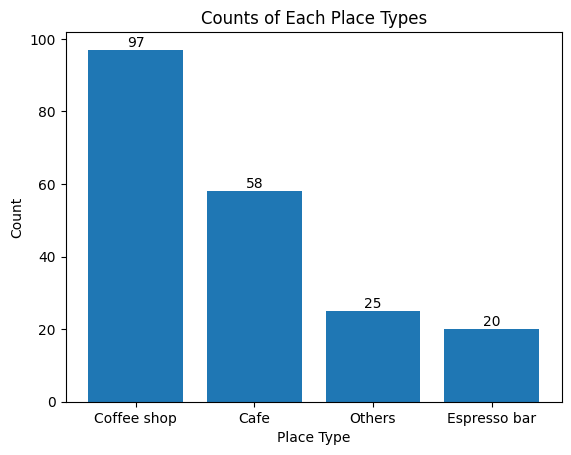

In [30]:
# Count the number of records for each coffee_type
coffee_type_counts = coffee['place_type'].value_counts()

# Create a bar chart
plt.bar(coffee_type_counts.index, coffee_type_counts.values)

# Add labels and title
plt.xlabel('Place Type')
plt.ylabel('Count')
plt.title('Counts of Each Place Types')

# Add count labels to each bar
for i, count in enumerate(coffee_type_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the chart
plt.show()

### Comment
- The 'Coffe Shop' type is the category with the most observations (97 out of 200 -> ~50%). As we can see on the chart above, the observations are unbalanced between the 4 categories.

## Task 3: 
Describe the distribution of all of the number of reviews. Your answer must include a visualization that shows the distribution.

### Coment
We can see from the chart below that most places have less than 1000 reviews (82%). So the distribution is right skewed. There is only 1 outlier who gets more than 3000 reviews

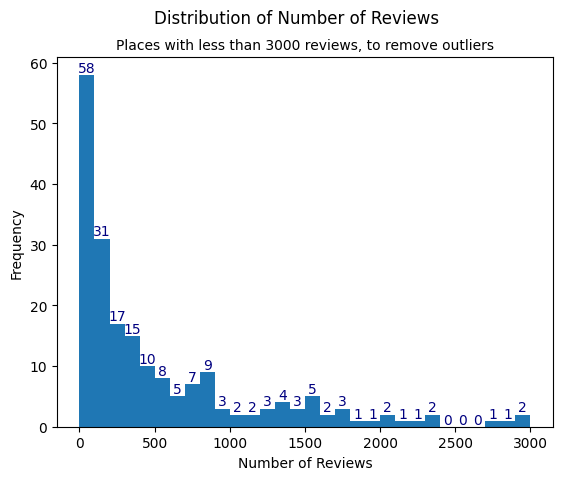

In [67]:
# Create a histogram of the number of reviews, capping the number of reviews at 3000
values, bins, bars = plt.hist(coffee['reviews'], bins=30, range=(0, 3000))

# Add labels and title
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.suptitle('Distribution of Number of Reviews')
plt.title('Places with less than 3000 reviews, to remove outliers', fontsize = 10)
plt.bar_label(bars,  color='navy')

# Display the histogram
plt.show()

In [69]:
# Count the number of places with more than 1k reviews
more_than_1k_reviews = len(coffee[coffee['reviews'] > 1000])

# Count the number of places with less than 1k reviews
less_than_1k_reviews = len(coffee[coffee['reviews'] < 1000])

# Print the results
print(f"The number of places with more than 1k reviews is {more_than_1k_reviews}.")
print(f"The number of places with less than 1k reviews is {less_than_1k_reviews}.")

The number of places with more than 1k reviews is 37.
The number of places with less than 1k reviews is 163.


## Task 4: 
Describe the relationship between type of store and number of reviews. Your answer
must include a visualization to demonstrate the relationship.

### Coment: 
Removing the outlier with over 3000 reviews, we can focus on the main range of the data.
Based on the chart below we can see that the Review number are vary disperse also by Place Type.
Futher analysis should be still done to understand if store type does impact the number of reviews. 

We should focus the new product on Coffee Shops, because they are the type with the highest number of places with over 2k reviews, but also keep an open mind to include other types of places as well



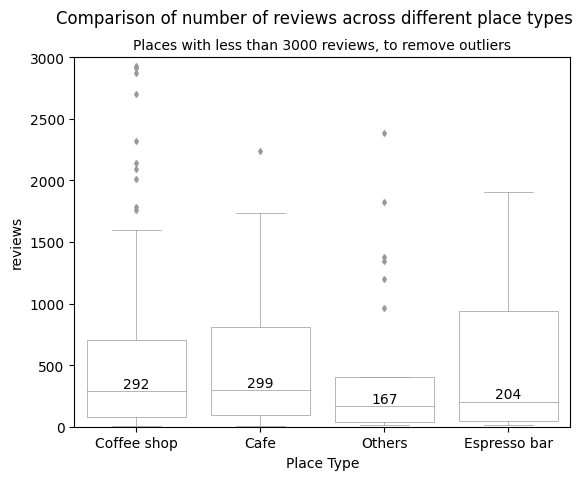

In [117]:
# Get the order to plot with the same logic than the first chart
previous_order = coffee['place_type'].value_counts().index.tolist()

# Create a box plot without colors
sns.boxplot(data=coffee, x='place_type', y='reviews', order=previous_order, color='white', linewidth=0.5, fliersize=3)

# Set the y-axis limit to 3000
plt.ylim(0, 3000)

# Add a title
plt.title('Places with less than 3000 reviews, to remove outliers', fontsize = 10)

# Add a subtitle
plt.suptitle('Comparison of number of reviews across different place types')

# Add a label with the median
medians = coffee.groupby('place_type')['reviews'].median()

for i, median in enumerate(medians[previous_order]):
    plt.text(i, median, str(int(median)), horizontalalignment='center', verticalalignment='bottom')

# Add a label for the x-axis
plt.xlabel('Place Type')

# Display the plot
plt.show()